# **LSTM Exercise**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow import keras


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
traffic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من traffic.csv",
                      usecols=[2],
                      )



In [4]:
traffic.head()

,Vehicles
0,15
1,13
2,10
3,7
4,9


In [5]:
traffic = traffic.values.astype("float32")

## Normalize the dataset

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

dataset = scaler.fit_transform(traffic)


## split into train and test sets

In [7]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print(len(train), len(test))




33684 14436


## function to prepare the train and test datasets for modeling.

In [18]:
def create_dataset(dataset, look_back = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])

  return np.array(dataX), np.array(dataY)



In [21]:
# Steps to look_back
look_back = 3

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


In [ ]:
X_train.shape

(33680, 3)

In [ ]:
X_train

array([[0.07821228, 0.0670391 , 0.05027933],
       [0.0670391 , 0.05027933, 0.03351955],
       [0.05027933, 0.03351955, 0.04469274],
       ...,
       [0.02793296, 0.02234637, 0.04469274],
       [0.02234637, 0.04469274, 0.02793296],
       [0.04469274, 0.02793296, 0.04469274]], dtype=float32)

In [22]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [23]:
X_train.shape

(33680, 3, 1)

In [24]:
X_train

array([[[0.07821228],
        [0.0670391 ],
        [0.05027933]],

       [[0.0670391 ],
        [0.05027933],
        [0.03351955]],

       [[0.05027933],
        [0.03351955],
        [0.04469274]],

       ...,

       [[0.02793296],
        [0.02234637],
        [0.04469274]],

       [[0.02234637],
        [0.04469274],
        [0.02793296]],

       [[0.04469274],
        [0.02793296],
        [0.04469274]]], dtype=float32)

## Fit the LSTM

In [25]:
model = Sequential()

model.add(keras.layers.LSTM(4, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(4))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0109
Epoch 2/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0031
Epoch 3/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0027
Epoch 4/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0026
Epoch 5/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0023
Epoch 6/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0020
Epoch 7/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0021
Epoch 8/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0020
Epoch 9/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0019
Epoch 10/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0019
Epoch 11/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0019
Epoch 12/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0020
Epoch 13/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0019
Epoch 14/100
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0019
Epoch 15/100

## Make preductuion and evaluatuin matrix.

In [27]:
y_train

array([0.03351955, 0.04469274, 0.02793296, ..., 0.02793296, 0.04469274,
       0.04469274], dtype=float32)

In [28]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform([y_train])

test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform([y_test])


1053/1053 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [29]:
train_pred[:, 0]

array([13.000827 , 10.628427 , 11.166022 , ..., 10.58643  ,  9.1505375,
       10.951385 ], dtype=float32)

In [30]:
y_train

array([[7.0000005 , 9.        , 5.99999975, ..., 5.99999975, 9.        ,
        9.        ]])

In [31]:
y_test

array([[14.99999917, 12.99999967, 14.00000008, ..., 29.99999875,
        15.99999958, 21.99999942]])

In [32]:
train_score = np.sqrt(mean_squared_error(y_train[0], train_pred[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = np.sqrt(mean_squared_error(y_test[0], test_pred[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))


Train Score: 5.02 RMSE
Test Score: 5.81 RMSE


## Visualize the result

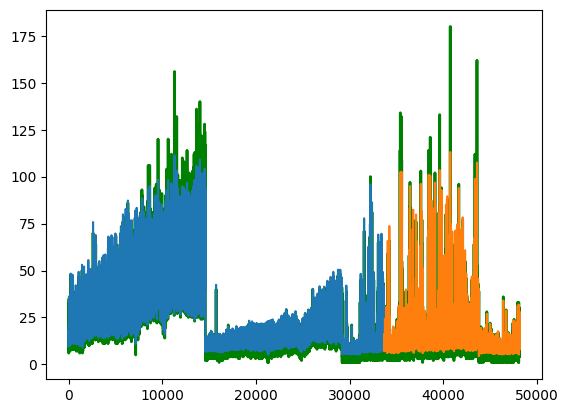

In [33]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_pred)+look_back, :] = train_pred

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_pred)+(look_back*2)+1:len(dataset)-1, :] = test_pred

plt.plot(scaler.inverse_transform(dataset), color='green', linewidth=2,)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


**Train RMSE (5.02):**

This is the Root Mean Squared Error on the training data. A lower RMSE indicates that the model predictions are close to the actual values on the training data. An RMSE of 5.02 suggests that the model is performing quite well on the training set.


**Test RMSE (5.81):**

This is the Root Mean Squared Error on the test data. The RMSE on the test data is slightly higher than on the training data, which is expected since the model has not seen the test data during training. An RMSE of 5.81 is still quite good, indicating that the model is generalizing well to unseen data.

---

**Orange Line:**

This likely represents the predictions for the training dataset. It closely follows the underlying actual values, indicating that the model has learned the pattern in the training data well.

**Green Line:**
This likely represents the predictions for the test dataset. It also follows the actual values, but with some deviations, particularly in areas with rapid fluctuations or spikes.

**Blue Line (or shadow):**
This line appears to represent the actual values of the number of vehicles. Both the orange and green lines should be compared against this to gauge the model's performance.

# **Well done** :)